In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#http://infolab.stanford.edu/~datar/courses/cs361a/papers/quantiles.pdf
#creates a summary on the data that gaurantees e-quantiles
def GK_summary (data, e):
    S = []
    s = 0
    for n in range (0,len(data)):
        if (n%(1/(2*e)) == 0 and s>4):
            #COMPRRESS()
            for i in range (s-4,0, -1):
                t_i = S[i]
                t_i_next = S[i+1]
                g_i_star  = t_i[1]
                descendents_list = []
                descendent_index = i - 1
                while ((BAND(S[descendent_index], n, e) < BAND(t_i, n, e)) and (descendent_index>=0)):
                    g_i_star += S[descendent_index][1]
                    descendents_list.append (descendent_index)
                    descendent_index -= 1 
                g_i_next = t_i_next[1]
                delta_i_next = t_i_next[2]
                if ((BAND(t_i, n, e)<= BAND (t_i_next, n, e)) and (g_i_star + g_i_next + delta_i_next <2*e*n)):
                    S[i+1][1]+= g_i_star
                    del S[i]
                    s-=1          
                    for j in range (len(descendents_list)):
                        del S[descendents_list[j]]
                        s-=1
        #INSERT
        v = data[n]
        if (len(S)==0):
            S.insert (0, [v, 1, 0])
            s+=1
        elif (v<S[0][0]):
            S.insert (0, [v, 1, 0])
            s+=1
        elif (v>S[len(S)-1][0]):
            S.append ([v, 1, 0])
            s+=1
        else:
            for i in range (1,len(S)):
                v_i_prior = S[i-1][0]
                v_i = S[i][0]
                if (v_i_prior<=v<v_i):
                    S.insert (i, [v, 1, math.floor(2*e*n)])
                    s+=1
                    break;  
    return S;

In [4]:
#From bands section
def BAND (t_i, n, e):
    #first 1/2e observations are in their own band
    if (n<(1/2*e)):
        return -1
    p = math.floor (2*e*n)
    if (t_i[2]==p):
        return 0
    band = 0
    for a in range (1,math.ceil(math.log(2*e*n))):
        if ((p-2**a-(p%2**a))<t_i[2]<=(p-2**(a-1)-(p%2**(a-1)))):
            band = a
            break;
    return band

In [5]:
#O((1/e)log(eN))
def quantile (S, e, q, N):
    r = math.ceil(q*N)
    r_min_v_i = 0
    v_i = None
    for i in range (len(S)):
        r_min_v_i += S[i][1]
        r_max_v_i = r_min_v_i + S[i][2]
        #print (e*N)
        #print (r-r_min_v_i)
        #print (r_max_v_i - r)
        #print (i)
        if (((r-r_min_v_i)<=e*N) and ((r_max_v_i - r) <= e*N)):
            v_i =  S[i][0]
            break;
    return v_i

In [6]:
#Test on one example
data = np.random.randint (0, 1000, (1,10000))[0]
e = .1
N = len(data)
summary = GK_summary(data,e)
quantile_estimate = quantile (summary, e, .1, N)
print(quantile_estimate)
print(np.quantile(data, .1))

73
99.0


Data size: 10000


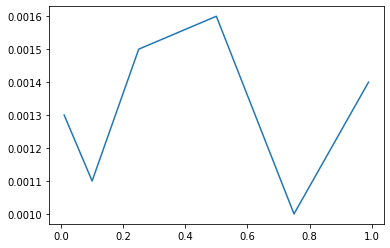

Data size: 25000


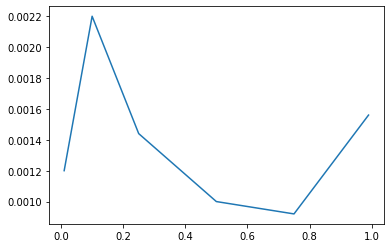

KeyboardInterrupt: 

In [7]:
#test on a range of examples, evaluate rank error
data_sizes = [10000, 25000, 50000, 100000, 250000, 500000, 1000000]
quantiles = [.01, .1, .25, .5, .75, .99]
examples = dict()
e = .001
for data_size in data_sizes:
    errors = []
    data = np.random.randint (0, 1000, (1,data_size))[0]
    N = len(data)
    summary = GK_summary(data,e)
    data.sort()
    for q in quantiles:
        quantile_estimate = quantile (summary, e, q, N)
        estimate_rank = len(data)
        for i in range (len(data)):
            if (data[i]>=quantile_estimate):
                estimate_rank = i
                break;
        error = abs(q*N-estimate_rank)/N
        examples[(data_size, quantile)] = error
        errors.append(error)
    print ("Data size: " + str(data_size))
    plt.plot (quantiles, errors)
    plt.show()      

In [13]:
#Estimate percentile within a range in dataset using GK summary (no guaruntees)
def range_estimate(summary, N, lower_bound, upper_bound):
    summary_range_data = []
    for i in range (len(summary)):
        if (lower_bound <= summary[i][0] <= upper_bound):
            summary_range_data.append(summary[i][0])
    proportion_estimate = len(summary_range_data)/len(summary)
    return proportion_estimate

In [14]:
#test with range on an example
data = np.random.randint (0, 1000, (1,10000))[0]
e = .1
q = .5
lower_bound = 0
upper_bound = 500
N = len(data)
summary = GK_summary(data,e)
proportion_estimate = range_estimate(summary, N, lower_bound, upper_bound)
#eval error
range_data  = []
for i in range (len(data)):
    if (lower_bound<=data[i]<=upper_bound):
        range_data.append(data[i])
proportion_actual = len(range_data)/len(data)
relative_error = abs(proportion_actual-proportion_estimate)/proportion_actual
print (relative_error)

0.0917124901806755


In [16]:
print (proportion_actual)

0.5092
